# MSE 497 - Python for Materials Engineers
#### Instructors: Arun Mannodi and Michael Titus
## Module 2 - Python Libraries and Data Handling

## **1. Introduction to NumPy**

**Why NumPy?**
- Efficient handling of numerical data for scientific computing.
- Arrays are faster and more versatile than Python lists for large datasets.

**Key Features:**
- Arrays: Multidimensional, homogeneous data structures.
- Mathematical operations on arrays (vectorized operations).
- Useful functions: `mean()`, `std()`, `linspace()`, `arange()`.

In [ ]:
import numpy as np

# Example: Densities of materials (kg/m^3)
densities = np.array([7850, 2700, 1200])  # Steel, Aluminum, Polymer
volumes = np.array([0.01, 0.02, 0.05])  # m^3

# Calculate masses
masses = densities * volumes
print("Masses (kg):", masses)

# Statistical analysis
mean_density = np.mean(densities)
print("Mean Density:", mean_density, "kg/m^3")

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

## **2. Introduction to Pandas**

**Why Pandas?**
- Easy manipulation and analysis of tabular data (like Excel).
- Data structures: `DataFrame` (tables) and `Series` (columns).

**Key Features:**
- Import/export data (`read_csv()`, `to_csv()`).
- Data filtering, grouping, and summarization.

In [ ]:
import pandas as pd

# Example: Create a DataFrame for material properties
data = {
    "Material": ["Steel", "Aluminum", "Polymer"],
    "Density (kg/m^3)": [7850, 2700, 1200],
    "Thermal Conductivity (W/mK)": [50.2, 205, 0.25]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Calculate mean thermal conductivity
mean_tc = df["Thermal Conductivity (W/mK)"].mean()
print("Mean Thermal Conductivity:", mean_tc)

# Filter materials with density > 2000 kg/m^3
dense_materials = df[df["Density (kg/m^3)"] > 2000]
print("\nDense Materials:")
print(dense_materials)

   Material  Density (kg/m^3)  Thermal Conductivity (W/mK)
0     Steel              7850                        50.20
1  Aluminum              2700                       205.00
2   Polymer              1200                         0.25
Mean Thermal Conductivity: 85.14999999999999

Dense Materials:
   Material  Density (kg/m^3)  Thermal Conductivity (W/mK)
0     Steel              7850                         50.2
1  Aluminum              2700                        205.0


In [ ]:
df.to_csv("material_properties.csv")

In [ ]:
file = pd.read_csv("file.csv")

In [ ]:
df2 = pd.DataFrame(file)

## **3. Introduction to Matplotlib**

**Why Matplotlib?**
- Create visualizations for data analysis and presentation.
- Useful for plotting trends, distributions, and comparisons.

**Key Features:**
- `plot()`: Line plots.
- `scatter()`: Scatter plots.
- `bar()`: Bar charts.
- Customization: Titles, labels, legends.

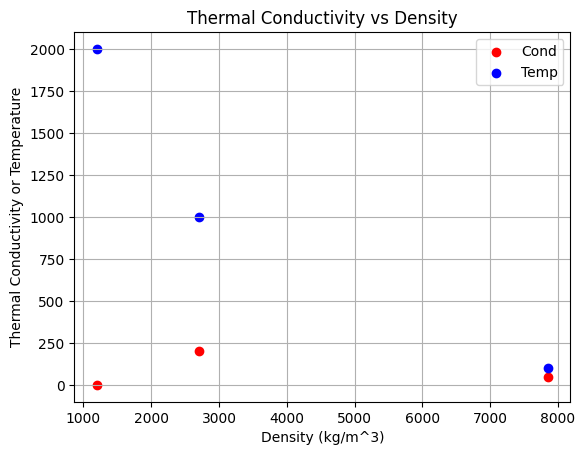

In [ ]:
import matplotlib.pyplot as plt

# Example: Density and Thermal Conductivity
materials = ["Steel", "Aluminum", "Polymer"]
densities = [7850, 2700, 1200]
thermal_conductivities = [50.2, 205, 0.25]
temperature = [100,1000,2000]

# Bar chart for densities
# plt.bar(materials, densities, color="salmon", width=0.8)
# plt.title("Material Densities", fontsize=24)
# plt.ylabel("Density (kg/m^3)")
# plt.xlabel("Materials")
# plt.xlim(-0.8, 2.8)
# plt.ylim(0, 10000)
# plt.savefig("material_densities.png")
# plt.show()

# Scatter plot for thermal conductivity
plt.scatter(densities, thermal_conductivities, color="red", label='Cond')
plt.scatter(densities, temperature, color="blue", label='Temp')
plt.title("Thermal Conductivity vs Density")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Thermal Conductivity or Temperature")
plt.grid(True)
#plt.legend(["Cond", "Temp"], loc=(0.9,0.5))
plt.legend()
plt.show()

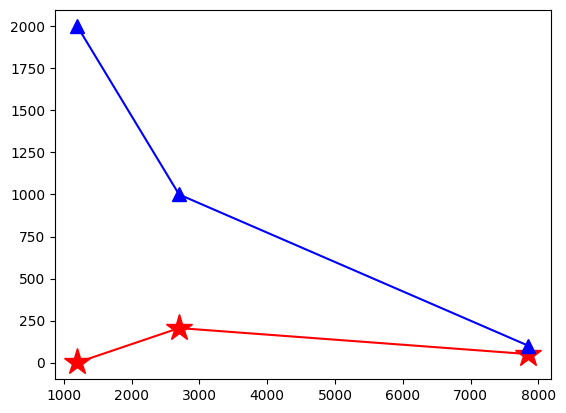

In [ ]:
plt.plot(densities, thermal_conductivities, color="red", label='Cond', marker="*", markersize=20)
plt.plot(densities, temperature, color="blue", label='Temp', marker="^", markersize=10)

## **Suggested Workflow for Combined Usage**
1. Use **Pandas** to load and manipulate material data.
2. Use **NumPy** for numerical calculations (e.g., derive new properties).
3. Use **Matplotlib** to visualize the results.



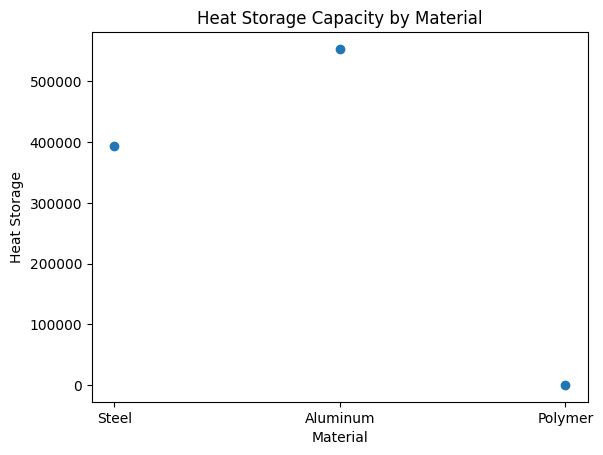

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Data
data = {
    "Material": ["Steel", "Aluminum", "Polymer"],
    "Density": [7850, 2700, 1200],
    "Thermal Conductivity": [50.2, 205, 0.25]
}
df = pd.DataFrame(data)

# Step 2: Numerical Analysis
densities = df["Density"].to_numpy()
thermal_conductivities = df["Thermal Conductivity"].to_numpy()
heat_storage = densities * thermal_conductivities

# Step 3: Visualization
plt.scatter(df["Material"], densities*thermal_conductivities, marker="o")
plt.title("Heat Storage Capacity by Material")
plt.ylabel("Heat Storage")
plt.xlabel("Material")
plt.show()

In [7]:
df["heat_storage"] = df["Density"] * df["Thermal Conductivity"]

In [11]:
df["heat_storage"].mean()

315956.6666666667

In [15]:
import numpy as np

heat_capacity = np.array([0.9, 0.45, 1.76, 0.79])
mass = np.array([500, 2500, 1200, 2000])
delta_T = np.array([100, 50, 200, 300])

thermal_energy = heat_capacity * mass * delta_T
print("energy in Joules = ", thermal_energy)

energy in Joules =  [ 45000.  56250. 422400. 474000.]


In [20]:
import os

In [27]:
df = pd.read_csv("/material_properties.csv")

In [30]:
df["Tensile Strength (MPa)"].size

39

In [35]:
avg_density = 0.0
k = 0
for i in range(0,39):
  if df["Tensile Strength (MPa)"][i] > 300:
    avg_density += df["Density (g/cm^3)"][i]
    k=k+1
avg_density = avg_density/k
print(avg_density)

7.119565217391303


In [41]:
import pandas as pd
data = pd.read_csv("/material_properties.csv")
df = pd.DataFrame(data)
filtered_data = df[data['Tensile Strength (MPa)']>300]
filtered_data['Density (g/cm^3)'].mean()


7.119565217391303

In [40]:
df[df["Tensile Strength (MPa)"] > 300]["Density (g/cm^3)"].mean()

7.119565217391303

In [33]:
df

,Material,Tensile Strength (MPa),Density (g/cm^3),Elastic Modulus (GPa)
0,Aluminum 6061-T6,310,2.70,69
1,Titanium (Ti-6Al-4V),950,4.43,110
2,Stainless Steel 304,550,8.00,200
3,Copper,210,8.96,110
4,Magnesium AZ31,250,1.78,45
5,Nickel,600,8.90,200
6,Zinc,120,7.14,100
7,Inconel 718,1240,8.19,205
8,Brass (70Cu-30Zn),350,8.50,110
9,Tungsten,550,19.30,400


**Practice Questions:**
- Use NumPy to calculate the thermal energy stored in a material given its heat capacity, mass, and temperature change.
- Import a CSV file of material properties, filter materials with tensile strength above 300 MPa, and calculate the average density.
- Plot stress-strain curves for different materials using random data and customize the graph (title, labels, legend).

## **4. Introduction to Scikit-learn**

**Why Scikit-learn?**
- A powerful library for machine learning and data analysis.
- Ideal for regression, classification, clustering, and preprocessing tasks.

**Key Features:**
- Simple APIs for implementing machine learning models.
- Includes tools for data preprocessing, model training, evaluation, and prediction.



In [43]:
#Linear Regression: Predicting Strength from Density**
from sklearn.linear_model import LinearRegression
import numpy as np

# Data: Densities (kg/m^3) and Strengths (MPa)
densities = np.array([7850, 2700, 1200, 5000, 2000]).reshape(-1, 1)  # Reshaped for sklearn
strengths = np.array([400, 200, 50, 300, 100])  # Corresponding strengths

# Model Training
model = LinearRegression()
model.fit(densities, strengths)

# Predictions
new_density = np.array([[6000]])  # New material density
predicted_strength = model.predict(new_density)
print(f"Predicted Strength for density 6000 kg/m^3: {predicted_strength[0]:.2f} MPa")




Predicted Strength for density 6000 kg/m^3: 326.41 MPa


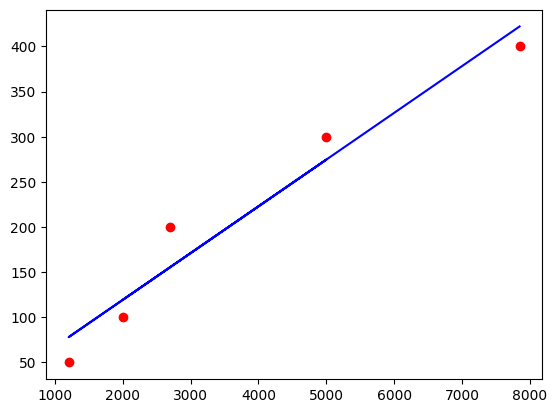

In [55]:
plt.scatter(densities, strengths, c='r')
plt.plot(densities, model.predict(densities), c='b')
plt.show()

In [56]:
model.intercept_

15.978822314049609

**Key Points:**
- Emphasize the simplicity of `.fit()` and `.predict()` methods.
- Discuss applications, e.g., predicting properties based on experimental data.


In [ ]:
#Data Preprocessing with Scikit-learn
from sklearn.preprocessing import StandardScaler

# Example: Scaling material properties
properties = np.array([[7850, 400], [2700, 200], [1200, 50]])  # Density, Strength
scaler = StandardScaler()
scaled_properties = scaler.fit_transform(properties)
print("Scaled Properties:\n", scaled_properties)

## **5. Introduction to SciPy**

**Why SciPy?**
- A library for scientific computing that builds on NumPy.
- Includes modules for optimization, integration, interpolation, signal processing, and more.

**Key Features:**
- Optimization (`scipy.optimize`)
- Integration (`scipy.integrate`)
- Solving differential equations (`scipy.integrate.odeint`)
- Statistical analysis (`scipy.stats`)



In [ ]:
#Curve Fitting (Stress-Strain Relationship)**
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Experimental stress-strain data
strain = np.array([0.0, 0.01, 0.02, 0.03, 0.04])
stress = np.array([0, 200, 400, 600, 800])

# Linear model
def linear_model(x, E):
    return E * x  # Hooke's law: Stress = E * Strain

# Fit the model
popt, _ = curve_fit(linear_model, strain, stress)
E_fitted = popt[0]
print(f"Fitted Young's Modulus: {E_fitted:.2f} MPa")

# Plot the data and the fitted model
plt.scatter(strain, stress, label="Data")
plt.plot(strain, linear_model(strain, E_fitted), label=f"Fitted (E={E_fitted:.2f} MPa)", color="red")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

**Key Points:**
- Introduce the `curve_fit` method for parameter estimation.
- Discuss how to interpret fitted parameters in a materials science context.


In [ ]:
#Solving Differential Equations (Heat Transfer)**
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Heat transfer model: dT/dt = -k * T
def heat_transfer(T, t, k):
    return -k * T

# Parameters
k = 0.1  # Heat transfer coefficient
T0 = 100  # Initial temperature
time = np.linspace(0, 50, 100)  # Time points

# Solve ODE
temperature = odeint(heat_transfer, T0, time, args=(k,))

# Plot
plt.plot(time, temperature)
plt.title("Cooling Curve")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.show()

**Key Points:**
- Highlight SciPy’s versatility for solving physical models.
- Relate to practical problems like cooling rates or reaction kinetics.

### **Suggested Workflow for Combined Usage**
1. Use **Pandas** to load and preprocess material data.
2. Use **SciPy** for curve fitting or solving equations based on physical models.
3. Use **scikit-learn** for predictive modeling or clustering.

**Practice Questions:**
- Perform clustering on material densities using `KMeans` in scikit-learn.
- Use logistic regression to classify materials as metal or polymer based on their density and thermal conductivity.
- Use `scipy.optimize` to minimize the cost function of material production based on given parameters.
- Solve a second-order differential equation describing a spring-mass-damper system in materials testing.